In [3]:
# import des modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# ouverture des jeux de données
df = pd.read_csv("dataset/bmi_train.csv")

In [5]:
# exploration des données
print(f"La dimension du jeux de données est de {df.shape}, soit {df.shape[1]} colonnes et {df.shape[0]} lignes.")

La dimension du jeux de données est de (400, 4), soit 4 colonnes et 400 lignes.


In [6]:
df.head(5)

,Gender,Height,Weight,Index
0,Male,161,89,4
1,Male,179,127,4
2,Male,172,139,5
3,Male,153,104,5
4,Male,165,68,2


In [7]:
df.describe()

,Height,Weight,Index
count,400.000000,400.000000,400.000000
mean,170.362500,106.060000,3.737500
std,16.574011,32.362242,1.370507
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,171.000000,106.500000,4.000000
75%,184.000000,136.250000,5.000000
max,199.000000,160.000000,5.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  400 non-null    object
 1   Height  400 non-null    int64 
 2   Weight  400 non-null    int64 
 3   Index   400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [9]:
# transformation genre (traitement des données catégorielles)
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [10]:
gender_bool = {"Male": 0, "Female": 1}
df.Gender = df["Gender"].map(gender_bool)
df.head()

,Gender,Height,Weight,Index
0,0,161,89,4
1,0,179,127,4
2,0,172,139,5
3,0,153,104,5
4,0,165,68,2


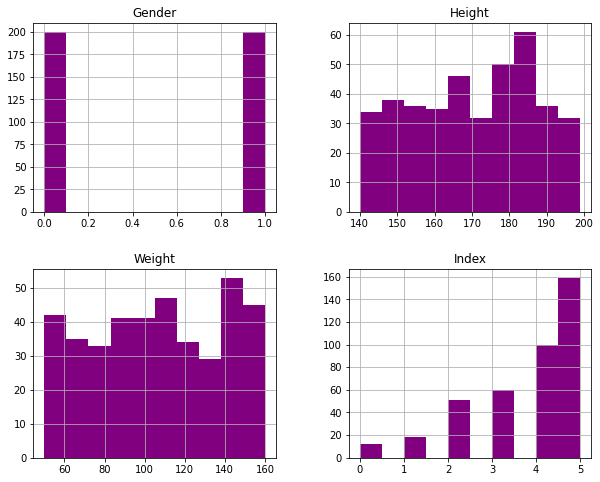

In [11]:
df.hist(bins=10, figsize=(10, 8), color="purple")
plt.show()

<Axes: >

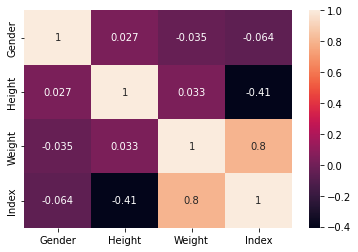

In [12]:
sns.heatmap(df.corr(), annot=True)

In [13]:
# Nettoyage des données manquantes
for datas in df.columns:
    print(f"Missing value dans la colonne {datas} est de {df[datas].isna().sum()}")

Missing value dans la colonne Gender est de 0
Missing value dans la colonne Height est de 0
Missing value dans la colonne Weight est de 0
Missing value dans la colonne Index est de 0


In [14]:
# collecte des features
features = [
    "Gender",
    "Height",
    "Weight",
]

In [15]:
# paramétrages des features et target
X = df[features]
y = df["Index"]

In [16]:
# import ML librairie
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [17]:
# split data
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
# create model and fit
model = DecisionTreeClassifier()
fit_model = model.fit(x_train, y_train)

In [19]:
predict = model.predict(x_test)

In [20]:
# Import des modules
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [21]:
# Métriques du modèle
precision = precision_score(y_test, predict, average='micro')
accuracy = accuracy_score(y_test, predict)
confusion = confusion_matrix(y_test, predict)

In [24]:
print(f"Model accuracy : {accuracy*100}%")
print(f"Model precision : {precision * 100}%")
print(f"Model confusion : {confusion}")

Model accuracy : 80.0%
Model precision : 80.0%
Model confusion : [[ 1  0  1  0  0  0]
 [ 0  3  2  0  0  0]
 [ 0  0 10  2  0  0]
 [ 0  0  4 12  1  0]
 [ 0  0  2  0 18  2]
 [ 0  0  0  0  6 36]]


[Text(0.5, 1.0, 'Matrice de confusion')]

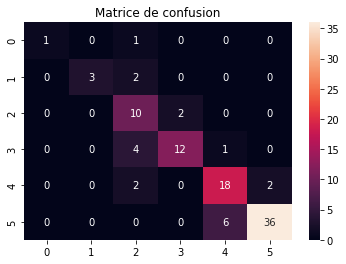

In [28]:
sns.heatmap(confusion, annot=True).set(title="Matrice de confusion")

In [29]:
# Prédire les valeurs dans bmi_validation.csv

In [41]:
dft = pd.read_csv("dataset/bmi_validation.csv")

In [42]:
dft.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [43]:
dft.head()

,Gender,Height,Weight
0,Male,161,103
1,Male,180,75
2,Male,174,95
3,Female,179,103
4,Female,192,140


In [44]:
Xd = dft

In [45]:
gender_bool = {"Male": 0, "Female": 1}
dft.Gender = dft["Gender"].map(gender_bool)
dft.head()

,Gender,Height,Weight
0,0,161,103
1,0,180,75
2,0,174,95
3,1,179,103
4,1,192,140


In [46]:
predict = model.predict(Xd)

In [48]:
dft["Index"] = predict

In [50]:
dft

,Gender,Height,Weight,Index
0,0,161,103,5
1,0,180,75,2
2,0,174,95,3
3,1,179,103,3
4,1,192,140,4
...,...,...,...,...
95,0,162,58,2
96,1,175,141,5
97,1,197,154,4
98,0,188,65,1


In [53]:
# export du modèle
dft.to_csv("dataset/bmi_validation_true.csv", index=False)